In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading data from city_day.csv taken from kaggle from 01-01-2015 to 31-12-2024 of various Indian Cities
df = pd.read_csv("India_Cities_AQI_Weather_2015_2024_Combined.csv")

In [3]:
df.head()

,Date,City,State,AQI,AQI_Category,PM2.5,PM10,NO2,SO2,CO,...,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Visibility_km,Month,Season
0,2015-01-01,Delhi,Delhi,282,Poor,121,180,86,63,5.75,...,-6.0,-1.5,76.4,0.0,11.1,N,1010.55,14.9,1,Winter
1,2015-01-02,Delhi,Delhi,210,Poor,85,139,59,45,4.10,...,-8.8,-3.1,48.9,0.0,9.2,S,1015.14,14.5,1,Winter
2,2015-01-03,Delhi,Delhi,257,Poor,107,168,72,59,5.54,...,-4.5,-0.3,53.7,0.0,7.1,NE,1017.66,14.2,1,Winter
3,2015-01-04,Delhi,Delhi,193,Moderate,88,126,48,36,3.58,...,-7.3,-0.6,76.7,0.0,10.4,NW,1009.99,15.0,1,Winter
4,2015-01-05,Delhi,Delhi,274,Poor,124,145,83,53,4.85,...,-3.1,4.4,66.1,0.0,12.8,NE,1016.24,15.0,1,Winter


### Analysing data 

#### Understanding the Data and handling missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      18265 non-null  object 
 1   City                      18265 non-null  object 
 2   State                     18265 non-null  object 
 3   AQI                       18265 non-null  int64  
 4   AQI_Category              18265 non-null  object 
 5   PM2.5                     18265 non-null  int64  
 6   PM10                      18265 non-null  int64  
 7   NO2                       18265 non-null  int64  
 8   SO2                       18265 non-null  int64  
 9   CO                        18265 non-null  float64
 10  O3                        18265 non-null  int64  
 11  NH3                       18265 non-null  int64  
 12  Max_Temperature_C         18265 non-null  float64
 13  Min_Temperature_C         18265 non-null  float64
 14  Avg_Te

In [5]:
df.shape

(18265, 23)

In [6]:
df.columns

Index(['Date', 'City', 'State', 'AQI', 'AQI_Category', 'PM2.5', 'PM10', 'NO2',
       'SO2', 'CO', 'O3', 'NH3', 'Max_Temperature_C', 'Min_Temperature_C',
       'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm',
       'Wind_Speed_kmh', 'Wind_Direction', 'Atmospheric_Pressure_hPa',
       'Visibility_km', 'Month', 'Season'],
      dtype='object')

In [7]:
df.describe()

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,NH3,Max_Temperature_C,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Atmospheric_Pressure_hPa,Visibility_km,Month
count,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000
mean,117.620476,46.519244,70.035532,34.795292,22.990857,2.357313,40.670025,17.231371,25.974563,14.468119,20.221276,76.384216,1.266685,8.822502,1013.242090,9.774481,6.522310
std,50.482348,22.559589,33.684170,17.062194,11.242799,1.126961,21.112863,9.518506,9.786889,9.987360,9.836193,13.852881,5.116442,3.592870,10.039602,2.746346,3.448967
min,21.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,-3.700000,-17.800000,-10.800000,30.000000,0.000000,0.000000,962.360000,0.500000,1.000000
25%,81.000000,30.000000,46.000000,23.000000,15.000000,1.570000,26.000000,10.000000,18.800000,7.100000,13.000000,66.600000,0.000000,6.300000,1006.500000,7.900000,4.000000
50%,107.000000,43.000000,65.000000,33.000000,21.000000,2.200000,38.000000,16.000000,26.100000,14.700000,20.300000,76.700000,0.000000,8.800000,1013.210000,9.800000,7.000000
75%,143.000000,59.000000,89.000000,44.000000,29.000000,2.980000,53.000000,23.000000,33.500000,22.100000,27.800000,86.700000,0.000000,11.200000,1020.090000,11.800000,10.000000
max,371.000000,167.000000,242.000000,118.000000,77.000000,8.960000,142.000000,65.000000,52.100000,43.100000,47.600000,100.000000,134.400000,23.200000,1055.000000,15.000000,12.000000


In [8]:
#converting date column into datetime object
df["Date"]=pd.to_datetime(df["Date"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      18265 non-null  datetime64[ns]
 1   City                      18265 non-null  object        
 2   State                     18265 non-null  object        
 3   AQI                       18265 non-null  int64         
 4   AQI_Category              18265 non-null  object        
 5   PM2.5                     18265 non-null  int64         
 6   PM10                      18265 non-null  int64         
 7   NO2                       18265 non-null  int64         
 8   SO2                       18265 non-null  int64         
 9   CO                        18265 non-null  float64       
 10  O3                        18265 non-null  int64         
 11  NH3                       18265 non-null  int64         
 12  Max_Temperature_C 

In [11]:
#diving group based on city names
group_df = df.groupby("City")

#making city wise dataframe
chennai_df = group_df.get_group("Chennai")

In [12]:
chennai_df

,Date,City,State,AQI,AQI_Category,PM2.5,PM10,NO2,SO2,CO,...,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Visibility_km,Month,Season
3653,2015-01-01,Chennai,Tamil Nadu,136,Moderate,46,127,41,27,2.65,...,2.6,9.9,85.4,0.0,16.6,W,1021.87,13.7,1,Winter
3654,2015-01-02,Chennai,Tamil Nadu,113,Moderate,56,80,35,15,2.59,...,14.5,19.0,65.1,0.0,8.7,SE,1024.18,14.0,1,Winter
3655,2015-01-03,Chennai,Tamil Nadu,130,Moderate,56,87,54,35,2.63,...,10.3,15.0,64.4,0.0,9.3,E,1022.61,9.7,1,Winter
3656,2015-01-04,Chennai,Tamil Nadu,81,Satisfactory,41,58,19,18,2.39,...,13.2,18.3,81.2,0.0,12.7,SW,999.89,12.1,1,Winter
3657,2015-01-05,Chennai,Tamil Nadu,122,Moderate,48,76,30,33,1.50,...,12.8,17.2,76.2,0.0,13.2,SE,962.36,11.0,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301,2024-12-27,Chennai,Tamil Nadu,96,Satisfactory,28,73,16,21,2.48,...,8.7,13.9,94.9,0.0,10.4,S,1029.05,9.5,12,Winter
7302,2024-12-28,Chennai,Tamil Nadu,114,Moderate,33,91,31,25,2.48,...,5.6,11.9,58.2,0.0,10.9,N,1012.19,8.9,12,Winter
7303,2024-12-29,Chennai,Tamil Nadu,79,Satisfactory,36,28,29,12,1.55,...,11.4,17.8,68.4,0.0,13.1,E,1003.95,8.3,12,Winter
7304,2024-12-30,Chennai,Tamil Nadu,129,Moderate,59,83,40,29,2.05,...,8.7,13.9,67.3,0.0,13.1,NW,1018.13,11.6,12,Winter


In [13]:
#reseting indices
chennai_df = chennai_df.reset_index(drop=True)

In [14]:
chennai_df

,Date,City,State,AQI,AQI_Category,PM2.5,PM10,NO2,SO2,CO,...,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Visibility_km,Month,Season
0,2015-01-01,Chennai,Tamil Nadu,136,Moderate,46,127,41,27,2.65,...,2.6,9.9,85.4,0.0,16.6,W,1021.87,13.7,1,Winter
1,2015-01-02,Chennai,Tamil Nadu,113,Moderate,56,80,35,15,2.59,...,14.5,19.0,65.1,0.0,8.7,SE,1024.18,14.0,1,Winter
2,2015-01-03,Chennai,Tamil Nadu,130,Moderate,56,87,54,35,2.63,...,10.3,15.0,64.4,0.0,9.3,E,1022.61,9.7,1,Winter
3,2015-01-04,Chennai,Tamil Nadu,81,Satisfactory,41,58,19,18,2.39,...,13.2,18.3,81.2,0.0,12.7,SW,999.89,12.1,1,Winter
4,2015-01-05,Chennai,Tamil Nadu,122,Moderate,48,76,30,33,1.50,...,12.8,17.2,76.2,0.0,13.2,SE,962.36,11.0,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2024-12-27,Chennai,Tamil Nadu,96,Satisfactory,28,73,16,21,2.48,...,8.7,13.9,94.9,0.0,10.4,S,1029.05,9.5,12,Winter
3649,2024-12-28,Chennai,Tamil Nadu,114,Moderate,33,91,31,25,2.48,...,5.6,11.9,58.2,0.0,10.9,N,1012.19,8.9,12,Winter
3650,2024-12-29,Chennai,Tamil Nadu,79,Satisfactory,36,28,29,12,1.55,...,11.4,17.8,68.4,0.0,13.1,E,1003.95,8.3,12,Winter
3651,2024-12-30,Chennai,Tamil Nadu,129,Moderate,59,83,40,29,2.05,...,8.7,13.9,67.3,0.0,13.1,NW,1018.13,11.6,12,Winter


### Forecasting using FB Prophet

In [15]:
chennai_df

,Date,City,State,AQI,AQI_Category,PM2.5,PM10,NO2,SO2,CO,...,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Wind_Direction,Atmospheric_Pressure_hPa,Visibility_km,Month,Season
0,2015-01-01,Chennai,Tamil Nadu,136,Moderate,46,127,41,27,2.65,...,2.6,9.9,85.4,0.0,16.6,W,1021.87,13.7,1,Winter
1,2015-01-02,Chennai,Tamil Nadu,113,Moderate,56,80,35,15,2.59,...,14.5,19.0,65.1,0.0,8.7,SE,1024.18,14.0,1,Winter
2,2015-01-03,Chennai,Tamil Nadu,130,Moderate,56,87,54,35,2.63,...,10.3,15.0,64.4,0.0,9.3,E,1022.61,9.7,1,Winter
3,2015-01-04,Chennai,Tamil Nadu,81,Satisfactory,41,58,19,18,2.39,...,13.2,18.3,81.2,0.0,12.7,SW,999.89,12.1,1,Winter
4,2015-01-05,Chennai,Tamil Nadu,122,Moderate,48,76,30,33,1.50,...,12.8,17.2,76.2,0.0,13.2,SE,962.36,11.0,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2024-12-27,Chennai,Tamil Nadu,96,Satisfactory,28,73,16,21,2.48,...,8.7,13.9,94.9,0.0,10.4,S,1029.05,9.5,12,Winter
3649,2024-12-28,Chennai,Tamil Nadu,114,Moderate,33,91,31,25,2.48,...,5.6,11.9,58.2,0.0,10.9,N,1012.19,8.9,12,Winter
3650,2024-12-29,Chennai,Tamil Nadu,79,Satisfactory,36,28,29,12,1.55,...,11.4,17.8,68.4,0.0,13.1,E,1003.95,8.3,12,Winter
3651,2024-12-30,Chennai,Tamil Nadu,129,Moderate,59,83,40,29,2.05,...,8.7,13.9,67.3,0.0,13.1,NW,1018.13,11.6,12,Winter


In [16]:
chennai_df.columns

Index(['Date', 'City', 'State', 'AQI', 'AQI_Category', 'PM2.5', 'PM10', 'NO2',
       'SO2', 'CO', 'O3', 'NH3', 'Max_Temperature_C', 'Min_Temperature_C',
       'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm',
       'Wind_Speed_kmh', 'Wind_Direction', 'Atmospheric_Pressure_hPa',
       'Visibility_km', 'Month', 'Season'],
      dtype='object')

In [17]:
chennai_df.index

RangeIndex(start=0, stop=3653, step=1)

In [18]:
#splitting each pollutant
#pm2.5
chennai_pm25 = pd.DataFrame(chennai_df[["Date", "PM2.5"]])
chennai_pm25.columns = ["ds", "y"]

#pm10
chennai_pm10 = pd.DataFrame(chennai_df[["Date", "PM10"]])
chennai_pm10.columns = ["ds", "y"]

#NO2
chennai_no2 = pd.DataFrame(chennai_df[["Date", "NO2"]])
chennai_no2.columns = ["ds", "y"]

#NH3
chennai_nh3 = pd.DataFrame(chennai_df[["Date", "NH3"]])
chennai_nh3.columns = ["ds", "y"]

#CO
chennai_co = pd.DataFrame(chennai_df[["Date", "CO"]])
chennai_co.columns = ["ds", "y"]

#SO2
chennai_so2 = pd.DataFrame(chennai_df[["Date", "SO2"]])
chennai_so2.columns = ["ds", "y"]

#O3
chennai_o3 = pd.DataFrame(chennai_df[["Date", "O3"]])
chennai_o3.columns = ["ds", "y"]


In [19]:
chennai_pm25['ds']

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
          ...    
3648   2024-12-27
3649   2024-12-28
3650   2024-12-29
3651   2024-12-30
3652   2024-12-31
Name: ds, Length: 3653, dtype: datetime64[ns]

In [20]:
from prophet import Prophet

In [21]:
#initialize prophet for each pollutant
model_pm25 = Prophet()
model_pm25.fit(chennai_pm25)

#future timestamps
future_pm25 = model_pm25.make_future_dataframe(periods=365)

#predictions
forecast_pm25 = model_pm25.predict(future_pm25)

#print results
print(forecast_pm25[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:31:29 - cmdstanpy - INFO - Chain [1] start processing
11:31:29 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  42.784262   27.240456   59.029414
4014 2025-12-28  40.710589   25.253543   56.861317
4015 2025-12-29  44.397871   27.987542   59.784314
4016 2025-12-30  45.008467   28.654658   60.883974
4017 2025-12-31  44.605209   27.729489   59.624083


In [22]:
model_pm10 = Prophet()
model_pm10.fit(chennai_pm10)

#future timestamps
future_pm10 = model_pm10.make_future_dataframe(periods=365)

#predictions
forecast_pm10 = model_pm10.predict(future_pm10)

#print results
print(forecast_pm10[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:31:31 - cmdstanpy - INFO - Chain [1] start processing
11:31:32 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  63.937924   39.046580   87.048424
4014 2025-12-28  62.297204   38.927616   85.424896
4015 2025-12-29  66.851460   42.502052   90.143025
4016 2025-12-30  67.618824   43.849443   92.389580
4017 2025-12-31  67.698872   44.523370   90.854047


In [23]:
#initialize prophet for each pollutant
model_no2 = Prophet()
model_no2.fit(chennai_no2)

#future timestamps
future_no2 = model_no2.make_future_dataframe(periods=365)

#predictions
forecast_no2 = model_no2.predict(future_no2)

#print results
print(forecast_no2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:31:33 - cmdstanpy - INFO - Chain [1] start processing
11:31:33 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  31.583626   17.617143   44.033319
4014 2025-12-28  31.517825   19.376527   44.516838
4015 2025-12-29  33.390777   20.652361   45.736237
4016 2025-12-30  33.653900   21.346191   46.645617
4017 2025-12-31  33.804275   21.108282   46.207182


In [24]:
#initialize prophet for each pollutant
model_nh3 = Prophet()
model_nh3.fit(chennai_nh3)

#future timestamps
future_nh3 = model_nh3.make_future_dataframe(periods=365)

#predictions
forecast_nh3 = model_nh3.predict(future_nh3)

#print results
print(forecast_nh3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:31:34 - cmdstanpy - INFO - Chain [1] start processing
11:31:34 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  15.273276    7.505845   24.442045
4014 2025-12-28  15.053894    6.562930   23.344983
4015 2025-12-29  16.074908    8.250770   24.635627
4016 2025-12-30  16.474770    7.869566   24.854768
4017 2025-12-31  16.449716    7.849312   24.229170


In [25]:
#initialize prophet for each pollutant
model_co = Prophet()
model_co.fit(chennai_co)

#future timestamps
future_co = model_co.make_future_dataframe(periods=365)

#predictions
forecast_co = model_co.predict(future_co)

#print results
print(forecast_co[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:31:35 - cmdstanpy - INFO - Chain [1] start processing
11:31:36 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
4013 2025-12-27  2.132438    1.326644    2.989165
4014 2025-12-28  2.088681    1.350392    2.933003
4015 2025-12-29  2.250504    1.433710    3.056861
4016 2025-12-30  2.218898    1.402563    3.013057
4017 2025-12-31  2.293599    1.496342    3.155334


In [26]:
#initialize prophet for each pollutant
model_so2 = Prophet()
model_so2.fit(chennai_so2)

#future timestamps
future_so2 = model_so2.make_future_dataframe(periods=365)

#predictions
forecast_so2 = model_so2.predict(future_so2)

#print results
print(forecast_so2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:31:36 - cmdstanpy - INFO - Chain [1] start processing
11:31:37 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  20.382434   12.368668   28.271778
4014 2025-12-28  20.048635   12.365020   27.927170
4015 2025-12-29  21.928339   13.809869   30.536898
4016 2025-12-30  22.375937   14.069832   30.523268
4017 2025-12-31  21.714734   13.453080   29.331386


In [27]:
#initialize prophet for each pollutant
model_o3 = Prophet()
model_o3.fit(chennai_o3)

#future timestamps
future_o3 = model_o3.make_future_dataframe(periods=365)

#predictions
forecast_o3 = model_o3.predict(future_o3)

#print results
print(forecast_o3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

11:31:38 - cmdstanpy - INFO - Chain [1] start processing
11:31:38 - cmdstanpy - INFO - Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4013 2025-12-27  36.322018   19.510308   53.440519
4014 2025-12-28  35.932504   19.603688   52.329743
4015 2025-12-29  38.396277   21.247508   55.311821
4016 2025-12-30  38.905376   22.569383   55.165783
4017 2025-12-31  39.012455   22.328942   55.235894


### Plotting the forecast and trend

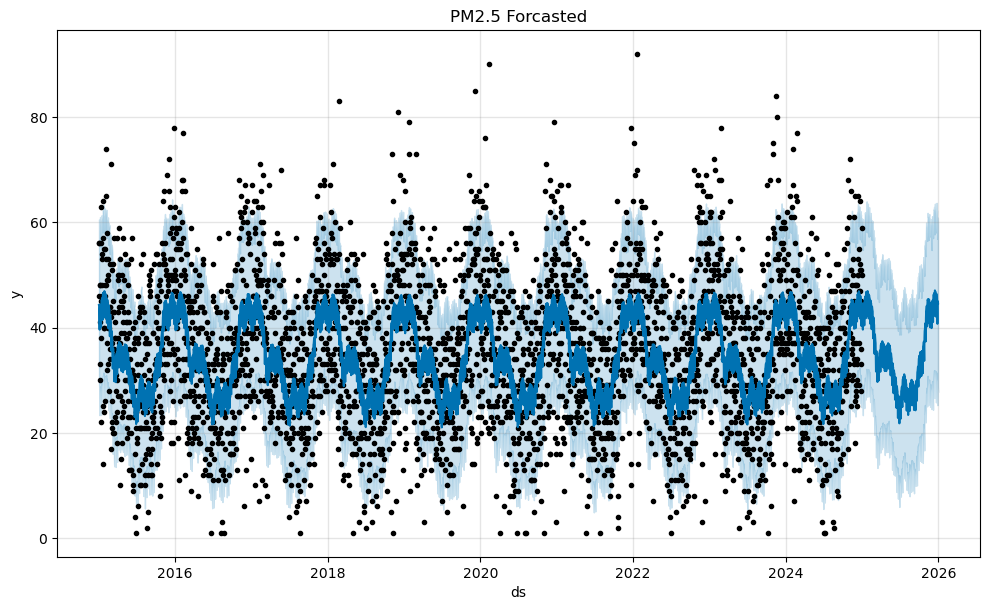

In [28]:
model_pm25.plot(forecast_pm25)
plt.title('PM2.5 Forcasted')
plt.show()

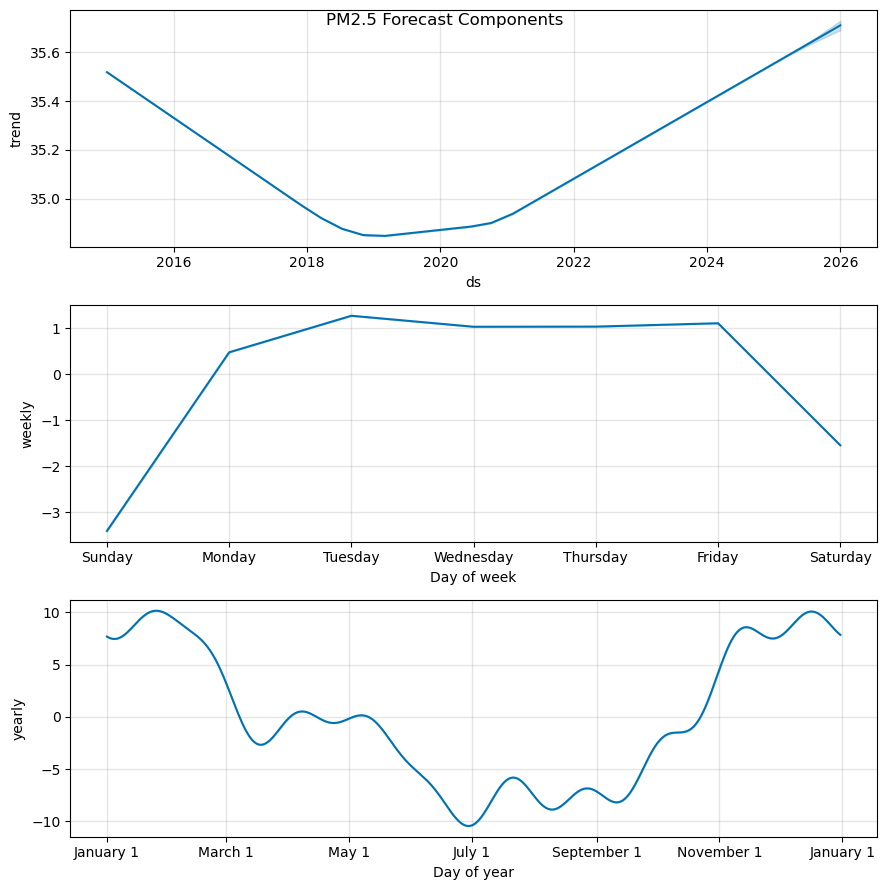

In [29]:
model_pm25.plot_components(forecast_pm25)
plt.suptitle('PM2.5 Forecast Components')
plt.show()

In [30]:
chennai_pm25.describe()

,ds,y
count,3653,3653.000000
mean,2020-01-01 00:00:00,35.127566
min,2015-01-01 00:00:00,1.000000
25%,2017-07-02 00:00:00,25.000000
50%,2020-01-01 00:00:00,35.000000
75%,2022-07-02 00:00:00,45.000000
max,2024-12-31 00:00:00,92.000000
std,NaN,14.148742


In [31]:
forecast_pm25['yhat'].describe()

count    4018.000000
mean       35.176353
std         6.795117
min        21.015971
25%        29.239601
50%        34.685303
75%        41.801461
max        47.057877
Name: yhat, dtype: float64

## Observation

Concentration of PM2.5 have a down trend till 2018 and witness the lowest concentration during 2019-2020, it is maximum on weekdays throughout the year, and it is minimum during monsoon(July-Sept)

Similar pattern can be seen with other pollutants.

## Correlation between Weather and AQI

In [32]:
chennai_df.columns

Index(['Date', 'City', 'State', 'AQI', 'AQI_Category', 'PM2.5', 'PM10', 'NO2',
       'SO2', 'CO', 'O3', 'NH3', 'Max_Temperature_C', 'Min_Temperature_C',
       'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm',
       'Wind_Speed_kmh', 'Wind_Direction', 'Atmospheric_Pressure_hPa',
       'Visibility_km', 'Month', 'Season'],
      dtype='object')

In [33]:
chennai_df[['AQI','Max_Temperature_C', 'Min_Temperature_C', 'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm', 'Wind_Speed_kmh', 'Atmospheric_Pressure_hPa', 'Visibility_km']].corr()

,AQI,Max_Temperature_C,Min_Temperature_C,Avg_Temperature_C,Humidity_Percent,Rainfall_mm,Wind_Speed_kmh,Atmospheric_Pressure_hPa,Visibility_km
AQI,1.000000,-0.527828,-0.516922,-0.526539,-0.311183,-0.123159,0.013273,-0.032235,0.310898
Max_Temperature_C,-0.527828,1.000000,0.967270,0.991473,0.298910,0.134593,-0.011998,-0.005306,-0.607046
Min_Temperature_C,-0.516922,0.967270,1.000000,0.992068,0.285279,0.135718,-0.014011,-0.003319,-0.589494
Avg_Temperature_C,-0.526539,0.991473,0.992068,1.000000,0.294328,0.136369,-0.013036,-0.004571,-0.603019
Humidity_Percent,-0.311183,0.298910,0.285279,0.294328,1.000000,0.134962,0.015417,-0.007209,-0.186102
Rainfall_mm,-0.123159,0.134593,0.135718,0.136369,0.134962,1.000000,0.001745,0.008031,-0.073354
Wind_Speed_kmh,0.013273,-0.011998,-0.014011,-0.013036,0.015417,0.001745,1.000000,0.022013,0.000887
Atmospheric_Pressure_hPa,-0.032235,-0.005306,-0.003319,-0.004571,-0.007209,0.008031,0.022013,1.000000,0.025879
Visibility_km,0.310898,-0.607046,-0.589494,-0.603019,-0.186102,-0.073354,0.000887,0.025879,1.000000


<Axes: >

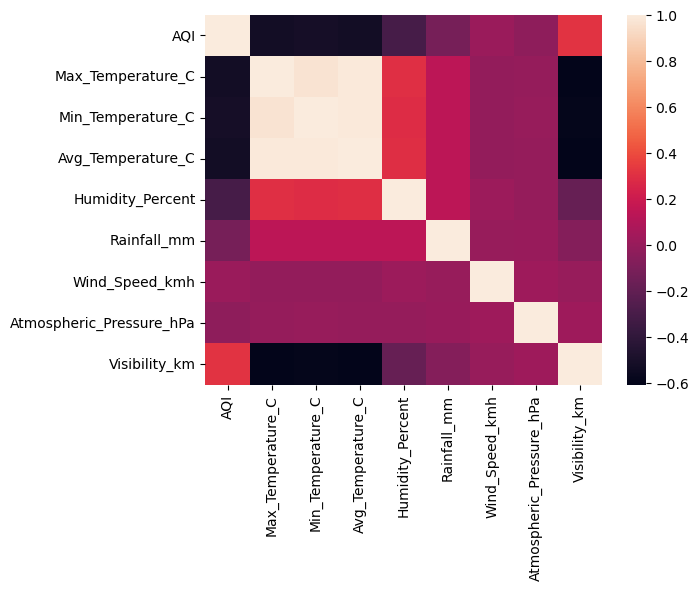

In [34]:
#visualising with heatmap
sns.heatmap(chennai_df[['AQI','Max_Temperature_C', 'Min_Temperature_C', 'Avg_Temperature_C', 'Humidity_Percent', 'Rainfall_mm', 'Wind_Speed_kmh', 'Atmospheric_Pressure_hPa', 'Visibility_km']].corr())

## Observation

AQI is highly affected by temparature, humidity and rainfall, but it is seen that it does not get much affected from wind speed and atmospheric pressure.

In [35]:
chennai_df['AQI'].describe()

count    3653.000000
mean       89.627430
std        25.583946
min        24.000000
25%        71.000000
50%        86.000000
75%       107.000000
max       181.000000
Name: AQI, dtype: float64

## Conclusion

chennai, being a South-Indian city, experiences varied and good Air Quality throught the year due to various changes in concentration of pollutants due to seasonal and weather changes. In comparison to oter cities, it witness good air quality as Bengaluru.